In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [3]:
# file_name = sys.argv[1]

file_name = "pca_c.txt"

In [4]:
data = np.loadtxt(file_name, delimiter="\t",dtype='str')
features_count = len(data[0])-1

In [5]:
data = np.asmatrix(data)
features = np.delete(data,features_count,1)
features = features.astype(np.float)
labels = data[:, features_count]

In [6]:
mean_features = np.mean(features, axis=0)
adjusted_data = features - mean_features
covariance_matrix = np.cov(adjusted_data.T)

w, v = LA.eig(covariance_matrix)
w

array([6.30362842, 2.55035107, 0.61269378, 0.32722388, 0.23861138,
       0.10855121, 0.07444964, 0.02384781, 0.03790944, 0.03325654,
       0.02968357])

In [7]:
w = w.argsort()[::-1][:2]
v = v[:,w]

principal_components = adjusted_data * v
principal_components = np.asarray(principal_components)

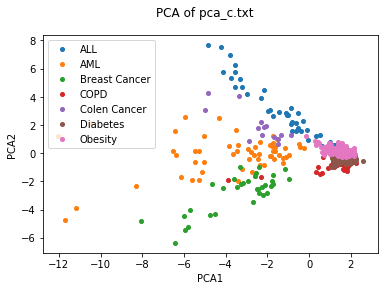

In [8]:
labels = labels.ravel().tolist()[0]
df = pd.DataFrame(dict(xAxis=principal_components[:,0], yAxis=principal_components[:,1], label=labels))
diesase_groups = df.groupby('label')
    
fig, ax = plt.subplots()
fig.suptitle('PCA of ' + file_name)
for disease, diesase_group in diesase_groups:
    ax.plot(diesase_group.xAxis, diesase_group.yAxis, marker='o', linestyle='', ms=4, label=disease)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
ax.legend()
plt.savefig('PCA_' + os.path.splitext(os.path.basename(file_name))[0] + ".png", dpi = 400)
plt.show()

In [9]:
svd = TruncatedSVD(n_components=2)
svd_features = svd.fit_transform(features)

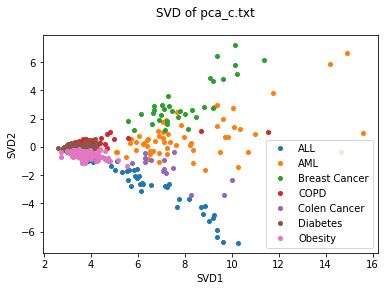

In [10]:
df = pd.DataFrame(dict(xAxis=svd_features[:,0], yAxis=svd_features[:,1], label=labels))
diesase_groups = df.groupby('label')
    
fig, ax = plt.subplots()
fig.suptitle('SVD of ' + file_name)
for disease, diesase_group in diesase_groups:
    ax.plot(diesase_group.xAxis, diesase_group.yAxis, marker='o', linestyle='', ms=4, label=disease)

plt.xlabel('SVD1')
plt.ylabel('SVD2')
ax.legend()
plt.savefig('SVD_' + os.path.splitext(os.path.basename(file_name))[0] + ".png", dpi = 400)
plt.show()

In [11]:
tsne = TSNE(n_components=2)
tsne_features = tsne.fit_transform(features)

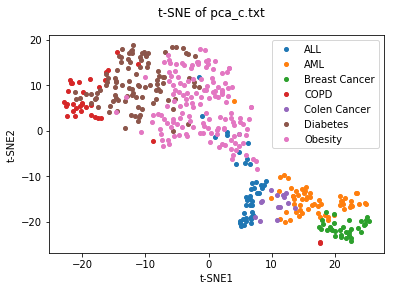

In [12]:
df = pd.DataFrame(dict(xAxis=tsne_features[:,0], yAxis=tsne_features[:,1], label=labels))
diesase_groups = df.groupby('label')
    
fig, ax = plt.subplots()
fig.suptitle('t-SNE of ' + file_name)
for disease, diesase_group in diesase_groups:
    ax.plot(diesase_group.xAxis, diesase_group.yAxis, marker='o', linestyle='', ms=4, label=disease)

plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
ax.legend()
plt.savefig('t-SNE_' + os.path.splitext(os.path.basename(file_name))[0] + ".png", dpi = 400)
plt.show()